<a href="https://colab.research.google.com/github/pandeyaditya1996/ML_Notebooks/blob/main/SVMClassificationOnIrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset from sklearn
iris = load_iris()

# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


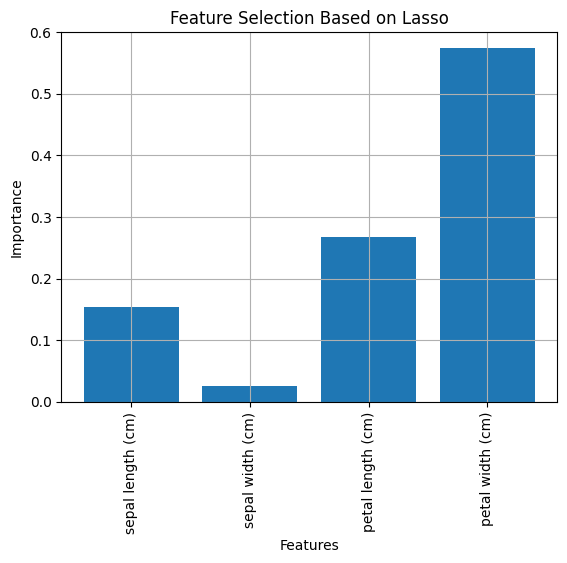

In [20]:

# clf = svm.SVC(kernel='linear',C=1.0)
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)


<Axes: >

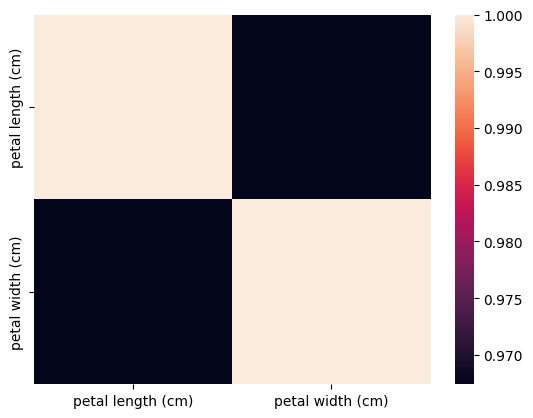

In [40]:
import seaborn as sns
sns.heatmap(X_train.corr())

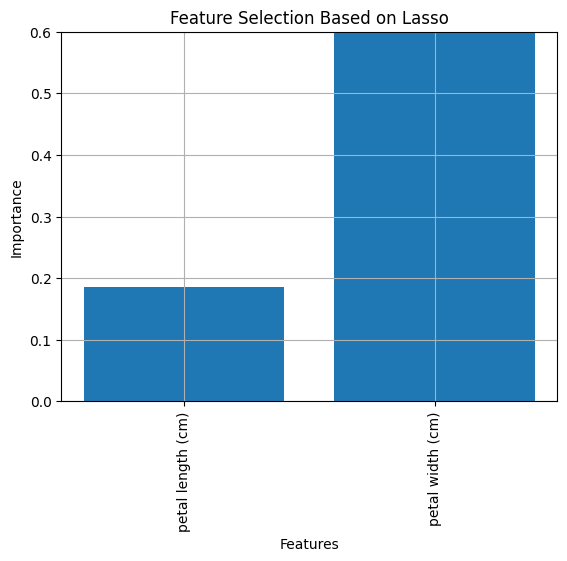

In [41]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
X = df.loc[:, features[2:]]
y = df.loc[:, ['target']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

from sklearn import svm
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso()
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)
import matplotlib.pyplot as plt
# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(features[2:], lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.6)
plt.show()

In [46]:
clf = svm.SVC(kernel='linear',C=9.8)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9736842105263158


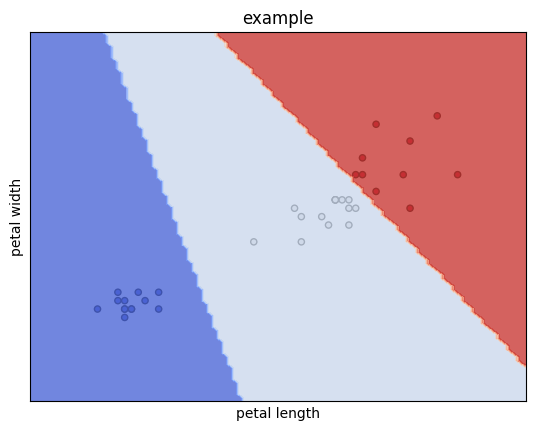

In [50]:
from sklearn.inspection import DecisionBoundaryDisplay
fig,ax = plt.subplots()
ax.scatter(X_test['petal length (cm)'].values, X_test['petal width (cm)'].values , c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('example')
disp = DecisionBoundaryDisplay.from_estimator(
clf,
X_test,
response_method="predict",
cmap=plt.cm.coolwarm,
alpha=0.8,
ax=ax,
xlabel='petal length',
ylabel='petal width'
)
plt.show()